In [79]:
import os
import numpy as np
import pandas as pd
import openpyxl
from openpyxl import load_workbook
 
data_folder = os.path.join(os.path.dirname(os.getcwd())+'/data/')

#Read in Yelp Data
yelp_data_raw = pd.read_csv(os.path.join(data_folder, 'Restaurants_Seattle_Updated.csv'))

#Remove all rows without ratings
yelp_data = yelp_data_raw[yelp_data_raw['Yelp Rating'].notna()]
yelp_data = yelp_data_raw[yelp_data_raw['Yelp Num Reviews'].notna()]

#Drop irrelevant Columns
yelp_data = yelp_data.drop(columns=['Unnamed: 0', 'Encoded Name', 'Searched City', 'Yelp URL'])

#Drop Duplicate entries
yelp_data = yelp_data.drop_duplicates( subset = ['Name', 'Yelp Address'])

#Drop entries that are not from Seattle
yelp_data = yelp_data[yelp_data['Yelp Address'].str.contains("Seattle", na=False)]
yelp_data["Zip Code"] = yelp_data['Yelp Address'].str.strip().str[-5:]

#Tool for extracting neighborhood from zip
neighborhood_zipcode = {}
zipcode = ['98101', '98102', '98103', '98104', '98105', '98107','98109', '98112', '98121', '98122', '98125', '98133']
neighborhood = ['Downtown', 'Capitol Hill', 'Fremont/Wallingford', 'Chinatown', 'University District', 'Ballard', 'Queen Anne/South Lake Union', 'Capitol Hill', 'Belltown', 'Capitol Hill', 'Northgate', 'Bitter Lake']
for i in range(len(zipcode)):
    neighborhood_zipcode[zipcode[i]] = neighborhood[i]
yelp_data['Neighborhood'] = 'Other'
yelp_data['Neighborhood'] = yelp_data['Zip Code'].map(neighborhood_zipcode).fillna(yelp_data['Neighborhood'])
yelp_data = yelp_data.drop(columns=['Yelp Neighborhood'])

#Export to csv
#yelp_data.to_csv(os.path.join(data_folder, 'Yelp_Processed.csv'))

In [87]:
#Preliminary EDA
import matplotlib.pyplot as plt
print(len(yelp_data))

#Extract average number of reviews
print(np.mean(yelp_data['Yelp Num Reviews']))
print(np.mean(yelp_data['Yelp Rating'].astype('Float32')))


462
620.2857142857143
4.034199


In [98]:
#Processing the Restaurant Types
tags = yelp_data["Yelp Tags"]
tags = tags.replace('[\[\]\"\' ]', '', regex=True)
unique_tags = {}
for row in tags:
    for tag in row.split(','):
        if tag not in unique_tags.keys():
            unique_tags[tag] = 1
        else:
            unique_tags[tag] += 1
sorted_dict = dict(sorted(unique_tags.items(), key=lambda item: item[1], reverse=True))

top_ten_count = np.array(list(sorted_dict.items())[:20])

new_categories = list(top_ten_count[:, 0])

In [104]:
top_ten_count[0, 1].

dtype('<U2')

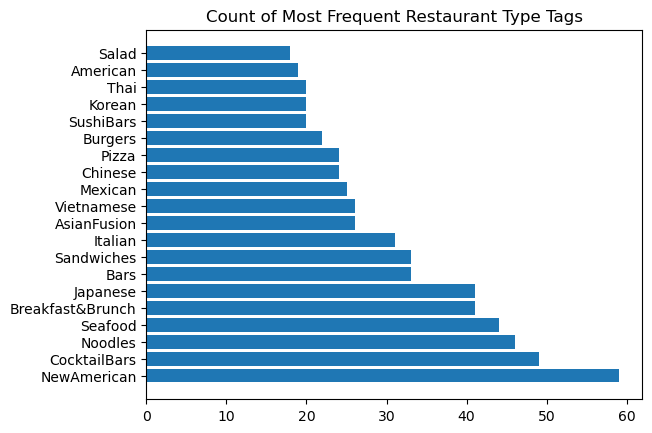

In [109]:
#Plotting Tags
ttc_df = pd.DataFrame({'Restaurant Type':top_ten_count[:, 0], 'Count':top_ten_count[:, 1]})
plt.barh(top_ten_count[:, 0], top_ten_count[:, 1].astype(int))
#plt.xticks(rotation=45)
plt.title('Count of Most Frequent Restaurant Type Tags')
plt.show()

Text(0.5, 0, 'Star Rating')

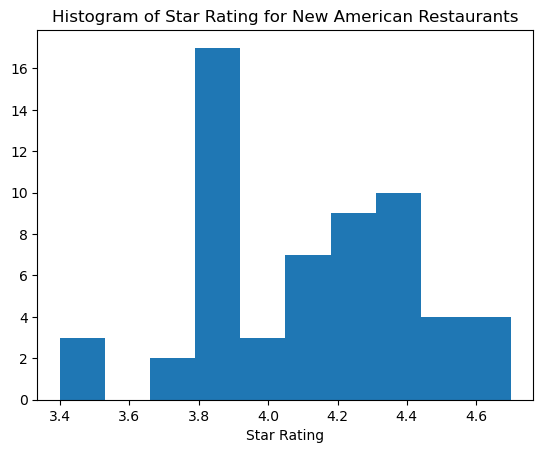

In [118]:
yelp_data_seafood = yelp_data[yelp_data['Yelp Tags'].str.contains("New", na=False)]
plt.hist(yelp_data_seafood['Yelp Rating'].astype('Float32'))
plt.title('Histogram of Star Rating for New American Restaurants')
plt.xlabel('Star Rating')